In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

In [23]:
disease_df = pd.read_csv("framingham.csv")
# disease_df.drop(columns=[])
disease_df.dropna(axis=0, inplace=True)

In [ ]:
X = np.asarray(disease_df[['age', 'male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

## Downsample
X_majority = X[y==0]
y_majority = y[y==0]
X_minority = X[y==1]
y_minority = y[y==1]

X_majority_downsampled, y_majority_downsampled = resample(X_minority, y_minority,
         replace=True,
         n_samples=len(X_majority),
         random_state=42)

X_downsampled = np.vstack((X_majority_downsampled, X_minority))
y_downsampled = np.hstack((y_majority_downsampled, y_minority))

X = X_downsampled
y = y_downsampled

X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [31]:
from collections import Counter
Counter(y)

Counter({np.int64(1): 3658})

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

In [28]:
print (accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1098, 335]

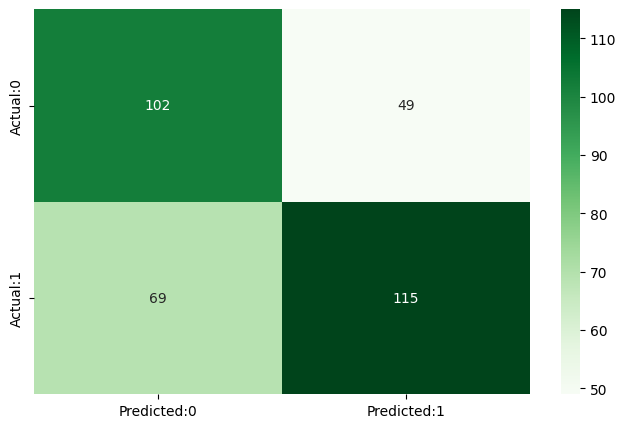

In [16]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot= True, fmt='d', cmap='Greens')
plt.show()

In [17]:
len(X)

1114